In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [21]:
dataset = pd.read_csv('cleaned_properties.csv')

# Exploratory Data Analysis (EDA)

Lets start by looking our dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        891 non-null    object 
 1   postal_code  891 non-null    int64  
 2   provider     891 non-null    object 
 3   beds         891 non-null    float64
 4   baths        891 non-null    float64
 5   sq_feet      891 non-null    float64
 6   price        891 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 48.9+ KB


In [4]:
dataset.head()

,title,postal_code,provider,beds,baths,sq_feet,price
0,Condo for sale,94102,Sotheby's International Realty,2.0,2.0,1155.0,1495000.0
1,House for sale,94102,Compass,4.0,3.0,4200.0,2500000.0
2,House for sale,94102,Compass,8.0,6.0,6330.0,3800000.0
3,Condo for sale,94102,Compass SF,2.0,2.0,1219.0,1199000.0
4,Condo for sale,94102,Keller Williams San Francisco,2.0,1.0,525.0,615000.0


A basic description of the dataset (just the numeric values)

In [5]:
dataset.describe()

,postal_code,beds,baths,sq_feet,price
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,94116.744108,3.060606,2.240180,2029.373034,1.966762e+06
std,11.546178,3.559246,1.299352,1743.536675,2.016753e+06
min,94102.000000,1.000000,1.000000,298.000000,2.400000e+05
25%,94109.000000,2.000000,1.000000,1030.000000,9.600000e+05
50%,94115.000000,2.000000,2.000000,1595.000000,1.395000e+06
75%,94123.000000,3.000000,3.000000,2255.000000,2.199000e+06
max,94158.000000,84.000000,13.000000,16830.000000,2.500000e+07


**NOTE: IN THIS CASE, WE SHOULD IGNORE POSTAL_CODE, SINCE ITS A CATEGORICAL VARIABLE (IN THIS CASE), EVEN THOUGH ITS A NUMBER**

From this we can observe a basic description of the general statistical features of the properties.

Lets note that the max value in beds its 84, I will talk about that later.

Everything else seems fine and plausible.

In [6]:
#Check for null values
dataset.isnull().sum()

title          0
postal_code    0
provider       0
beds           0
baths          0
sq_feet        0
price          0
dtype: int64

## Numerical Data

#### Dependent Variable

Let's take a look to the normal distribution of the target variable ('price') to look for skewness in the distribution

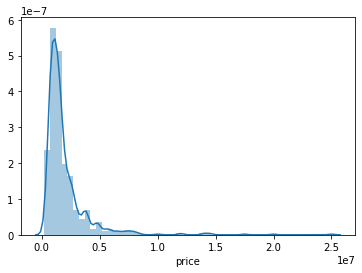

In [7]:
#Normal distribution of the price(target variable)
sns.distplot(dataset['price'])

The price has a highly right-skewness. 

In this case, I will transform the price to log scale, the main reason being the skewness for this data.

Text(0.5, 1.0, 'Distribution of Price(Transformed value on log scale)')

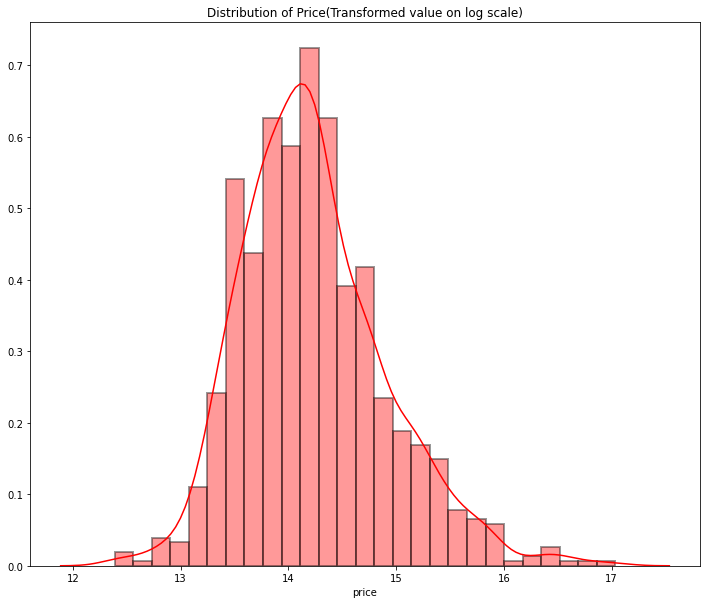

In [10]:
fig, axarr = plt.subplots(figsize=(12, 10))
sns.distplot(np.log(dataset['price']),color='red',hist_kws=dict(edgecolor="k", linewidth=2)).set_title('Distribution of Price(Transformed value on log scale)')

Now its better, its a normal distribution in its (almost) right form

#### Independent Variables

Now lets take a look to the independent numerical variables

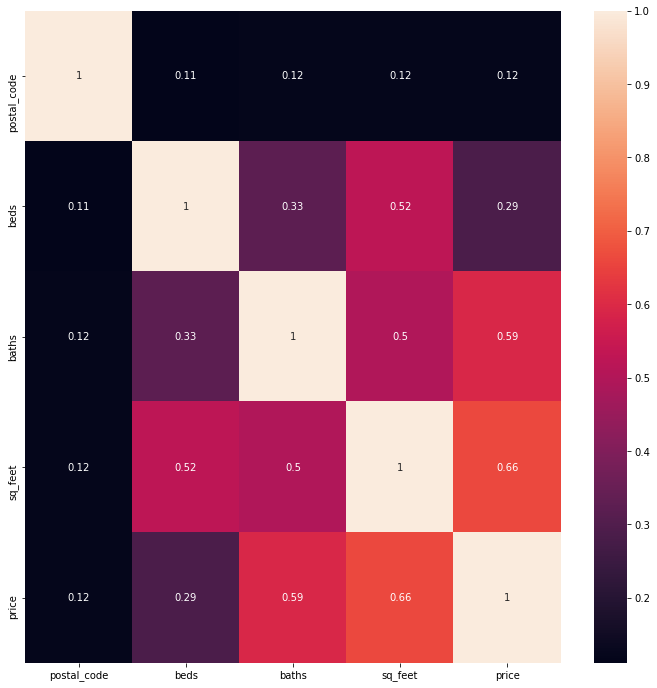

In [11]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(dataset.corr(),annot=True)

And lets compare this heatmap to a seaborn pairplot...

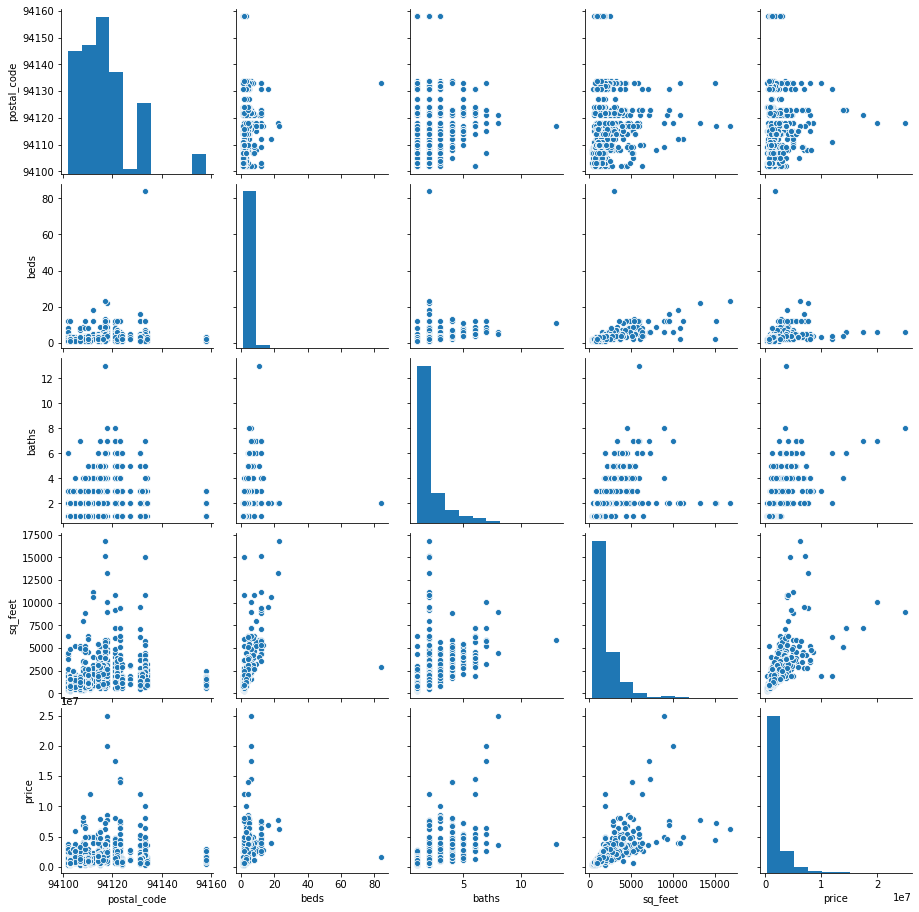

In [13]:
#Pairplot
sns.pairplot(dataset)

From this we can conclude the next general things
 * The price has a positive correlation with beds, baths and sq_feet (If this independent variables are bigger, the price grows to, which is logical)
 * The heatmap and the pairplot corresponf correctly to each graph
 * price has the highest correlation with sq_feet (Its actually the highest in the whole heatmap)
 * The data its sparse
 * Our 3 most "important" (this doesnt mean that they're incredibly fundamental) features are beds, baths and sq_feet

Before we look a litlte closer to our histograms, lets deal with that 84 bedroom observation

In [22]:
dataset[dataset.beds == 84]

,title,postal_code,provider,beds,baths,sq_feet,price
694,House for sale,94133,Madison Hunter,84.0,2.0,2952.0,1699000.0


Its worth nothing that this is the exact url for that property:
#https://www.zillow.com/homedetails/26-Varennes-St-San-Francisco-CA-94133/2073856389_zpid/

Taking that into account, that 84 its clearly a mistake so I'll just eliminate that row (890 observations its plenty of data)

In [23]:
dataset=dataset[dataset.beds != 84]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A1B4AD280>,
      dtype=object)

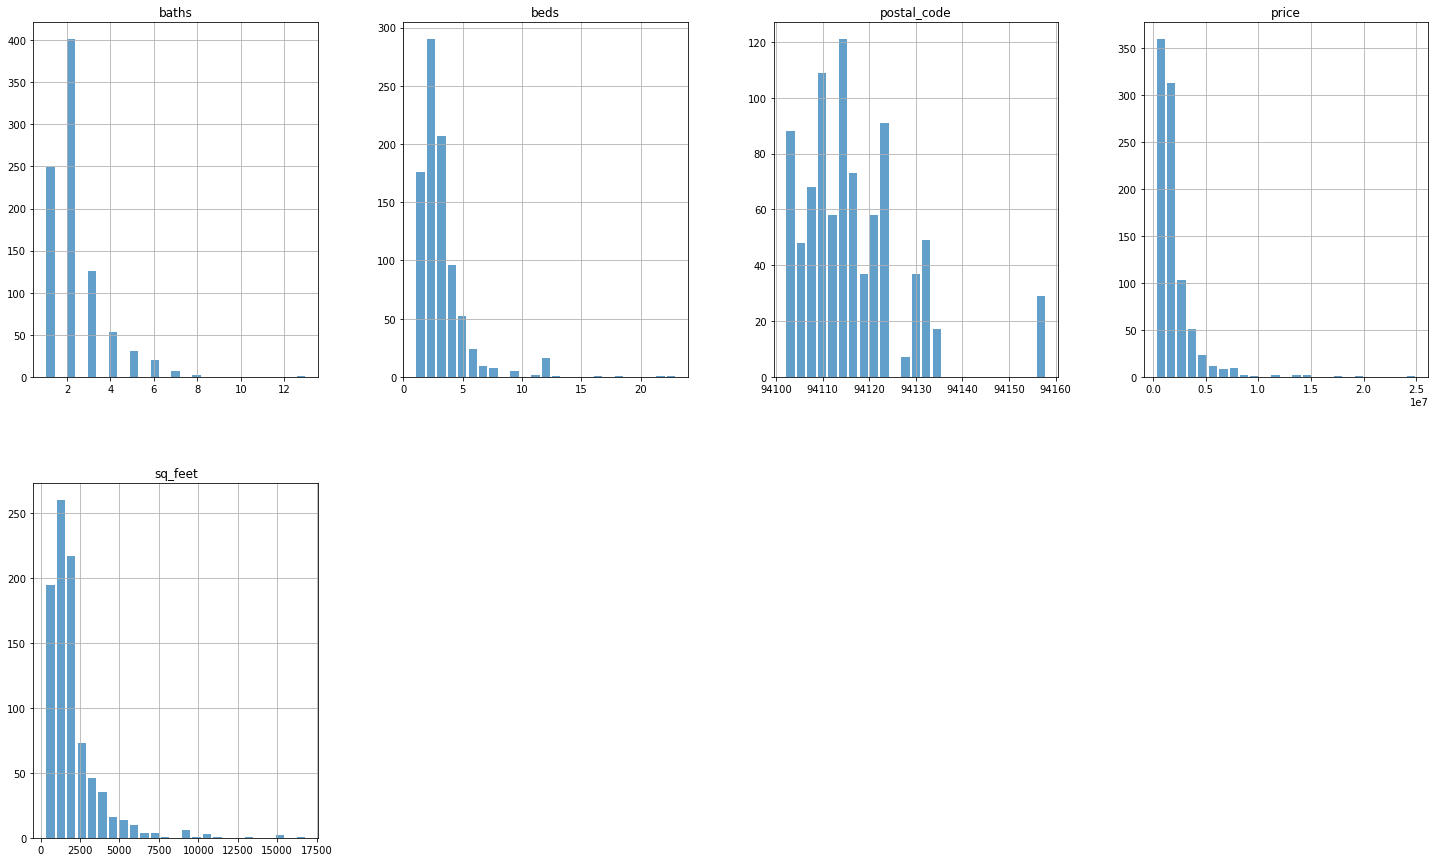

In [24]:
#Histograms of all numerical data
dataset.hist(bins=25, figsize=(25, 15), alpha=0.7, rwidth=0.80, layout=(2, 4))

With this, we can take a look to the most frequent values in our data. In this case the most frequent (or most ocurrences) property features in our dataset

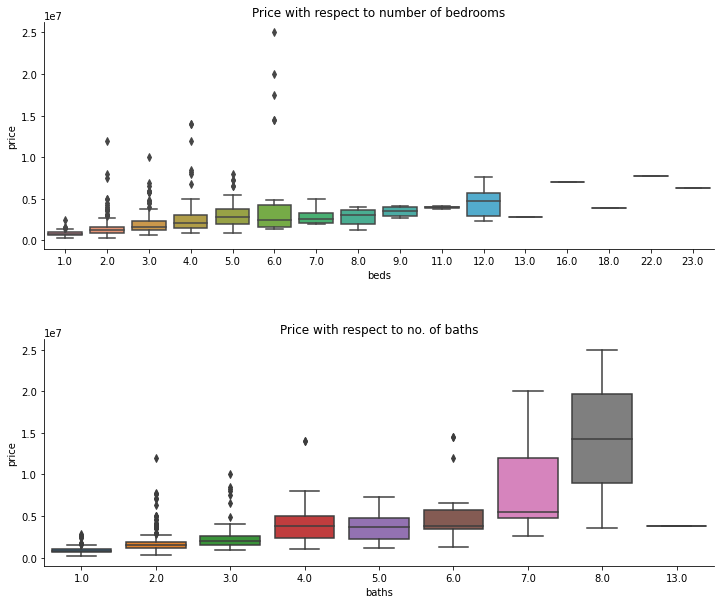

In [34]:
#Boxplots of beds and baths vs price
fig, axarr = plt.subplots(2,1, figsize=(12,10),squeeze=False)

sns.boxplot(x=dataset['beds'],y=dataset['price'],ax=axarr[0][0]).set_title('Price with respect to number of bedrooms')
sns.boxplot(x=dataset['baths'],y=dataset['price'],ax=axarr[1][0]).set_title('Price with respect to no. of baths')

plt.subplots_adjust(hspace=.4)
sns.despine()

## Categorical Data

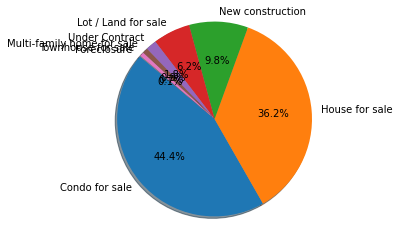

In [35]:
plt.pie(dataset.title.value_counts(), labels=dataset['title'].unique(), autopct='%1.1f%%', shadow=True, startangle=140)
dataset.title.value_counts()

plt.axis('equal')
plt.show()

Number of properties per postal code (which postal code have more properties for sale)

In [36]:
dataset.postal_code.value_counts()

94123    69
94114    61
94115    60
94109    57
94103    53
94110    52
94117    49
94105    48
94107    45
94133    40
94131    37
94118    37
94121    32
94158    29
94111    29
94112    29
94102    26
94122    26
94116    24
94108    23
94124    22
94134    17
94104     9
94132     9
94127     7
Name: postal_code, dtype: int64

Number of properties per title (how many X type propertie is for sale right now?)

In [28]:
dataset.title.value_counts()

Condo for sale                395
House for sale                322
Under Contract                 87
New construction               55
Multi-family home for sale     16
Lot / Land for sale             8
Townhouse for sale              6
Foreclosure                     1
Name: title, dtype: int64

How many providers are selling right know in San Francisco at zillow.com

In [29]:
print(len(dataset['provider'].unique()))

125


In [30]:
#Most common sellers in zillow.com for San francisco, CA
dataset.provider.value_counts().head()

Compass                           230
Vanguard Properties               105
Sotheby's International Realty     75
Corcoran Global Living             57
Coldwell Banker Realty             52
Name: provider, dtype: int64

What is the mean price for each of the 25 postal_code (or zone)?

In [32]:
#postal_code vs price (mean)
dataset.groupby('postal_code')['price'].mean()

postal_code
94102    1.325828e+06
94103    9.255820e+05
94104    1.727778e+06
94105    1.566250e+06
94107    1.227243e+06
94108    2.696609e+06
94109    1.378312e+06
94110    1.395135e+06
94111    1.493638e+06
94112    1.472621e+06
94114    1.898082e+06
94115    2.552943e+06
94116    1.459875e+06
94117    2.278559e+06
94118    3.590819e+06
94121    2.930500e+06
94122    1.514457e+06
94123    3.562812e+06
94124    8.460471e+05
94127    1.612000e+06
94131    2.180622e+06
94132    1.312444e+06
94133    2.589375e+06
94134    1.130686e+06
94158    1.702328e+06
Name: price, dtype: float64

There's a more legible table in the README

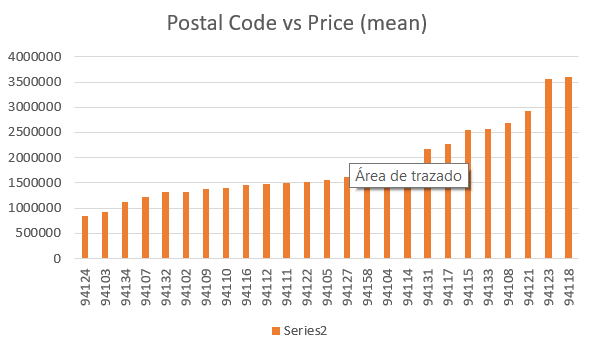

From this we can observe that the 3 most expensive (in average) postal codes are: 94118, 94123, and 94121

What is the mean price for each type of property?

In [33]:
#title_code vs price(mean)
dataset.groupby('title')['price'].mean()

title
Condo for sale                1.442265e+06
Foreclosure                   3.960000e+06
House for sale                2.605985e+06
Lot / Land for sale           1.794125e+06
Multi-family home for sale    2.507868e+06
New construction              2.425309e+06
Townhouse for sale            3.021500e+06
Under Contract                1.516137e+06
Name: price, dtype: float64

From this we can observe that the 3 most expensive (in average) types of properties are: Foreclosure, Townhouse for sale, and House for sale

Now that we're done with EDA, we can exclude 'provider' column and export this data set

In [37]:
dataset=dataset.drop(['provider'],axis=1)